# Lab 4 - Python Lab
## Author: *your name here*
## Date: 11:59PM March 11, 2022

Load up the famous iris dataset. We are going to do a different prediction problem. Imagine the only input x is Species and you are trying to predict y which is Petal.Length. A reasonable prediction is the average petal length within each Species. Prove that this is the OLS model by fitting an appropriate `LinearRegression` model and then using the predict function to verify.

In [8]:
# importing dependcies
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
# Looking at the dataset Bunch object
print(iris.keys())

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])


In [9]:
# Getting the description of a dataset using the DESCR key
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [10]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


<AxesSubplot:xlabel='target', ylabel='petal length (cm)'>

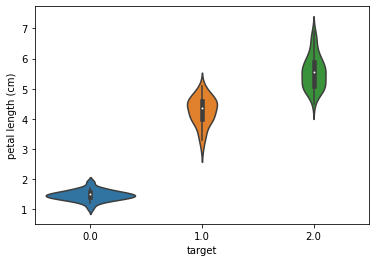

In [13]:
# plotting petal length kernels per species
sns.violinplot(data = df,
               x = "target",
               y = "petal length (cm)")

1. Construct the design matrix with an intercept, X.

In [110]:
# TO-DO
J = pd.get_dummies(df['target'],drop_first=True).to_numpy()
X = np.c_[np.ones(J.shape[0],dtype=np.int16),J]
X

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 0],
       [1, 1, 0],
       [1,

2. Find the hat matrix H for this regression.

In [111]:
# TO-DO
H = np.matrix.round(np.dot(np.dot(X,np.linalg.inv(np.dot(X.T,X))),X.T),2)
print(H)

[[ 0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02
   0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02
   0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02
   0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02
   0.02  0.02 -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.
  -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.
  -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.
  -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.   -0.
  -0.   -0.   -0.   -0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
   0.    0.    0.    0.    0.    0.  ]
 [ 0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02  0.02
   0.02  0.02  

3. Verify this hat matrix is symmetric.

In [112]:
# TO-DO
np.all(H==H.T)

True

4. Verify this hat matrix is idempotent.

In [113]:
# TO-DO
np.all(H.astype(np.int16)==np.dot(H,H).astype(np.int16))

True

5. Find the trace of the hat matrix.

In [114]:
# TO-DO
np.trace(H)

3.0

It turns out the trace of a hat matrix is the same as its rank! But we don't have time to prove these interesting and useful facts..

For masters students: create a matrix X-perpendicular.

In [116]:
# TO-DO
I = np.identity(len(H))
X_perp = np.dot((I-H),X)
X_perp

array([[-6.17561557e-16,  0.00000000e+00,  0.00000000e+00],
       [-6.17561557e-16,  0.00000000e+00,  0.00000000e+00],
       [-6.17561557e-16,  0.00000000e+00,  0.00000000e+00],
       [-6.17561557e-16,  0.00000000e+00,  0.00000000e+00],
       [-5.06539255e-16,  0.00000000e+00,  0.00000000e+00],
       [-5.06539255e-16,  0.00000000e+00,  0.00000000e+00],
       [-5.06539255e-16,  0.00000000e+00,  0.00000000e+00],
       [-5.06539255e-16,  0.00000000e+00,  0.00000000e+00],
       [-5.06539255e-16,  0.00000000e+00,  0.00000000e+00],
       [-3.95516953e-16,  0.00000000e+00,  0.00000000e+00],
       [-3.95516953e-16,  0.00000000e+00,  0.00000000e+00],
       [-3.95516953e-16,  0.00000000e+00,  0.00000000e+00],
       [-3.95516953e-16,  0.00000000e+00,  0.00000000e+00],
       [-3.95516953e-16,  0.00000000e+00,  0.00000000e+00],
       [-3.95516953e-16,  0.00000000e+00,  0.00000000e+00],
       [-3.95516953e-16,  0.00000000e+00,  0.00000000e+00],
       [-3.95516953e-16,  0.00000000e+00

6. Using the hat matrix, compute the yhat vector and using the projection onto the residual space, compute the e vector and verify they are orthogonal to each other.

In [141]:
# TO-DO
y = df["petal length (cm)"].to_numpy()
y_hat = np.dot(H,y).astype(np.float16)
print(np.unique(y_hat,return_counts=True))

e = np.dot((np.identity(df["petal length (cm)"].count()) -H ), y)
print(e.shape)
e



(array([1.462, 4.26 , 5.55 ], dtype=float16), array([50, 50, 50]))
(150,)


array([-0.062, -0.062, -0.162,  0.038, -0.062,  0.238, -0.062,  0.038,
       -0.062,  0.038,  0.038,  0.138, -0.062, -0.362, -0.262,  0.038,
       -0.162, -0.062,  0.238,  0.038,  0.238,  0.038, -0.462,  0.238,
        0.438,  0.138,  0.138,  0.038, -0.062,  0.138,  0.138,  0.038,
        0.038, -0.062,  0.038, -0.262, -0.162, -0.062, -0.162,  0.038,
       -0.162, -0.162, -0.162,  0.138,  0.438, -0.062,  0.138, -0.062,
        0.038, -0.062,  0.44 ,  0.24 ,  0.64 , -0.26 ,  0.34 ,  0.24 ,
        0.44 , -0.96 ,  0.34 , -0.36 , -0.76 , -0.06 , -0.26 ,  0.44 ,
       -0.66 ,  0.14 ,  0.24 , -0.16 ,  0.24 , -0.36 ,  0.54 , -0.26 ,
        0.64 ,  0.44 ,  0.04 ,  0.14 ,  0.54 ,  0.74 ,  0.24 , -0.76 ,
       -0.46 , -0.56 , -0.36 ,  0.84 ,  0.24 ,  0.24 ,  0.44 ,  0.14 ,
       -0.16 , -0.26 ,  0.14 ,  0.34 , -0.26 , -0.96 , -0.06 , -0.06 ,
       -0.06 ,  0.04 , -1.26 , -0.16 ,  0.448, -0.452,  0.348,  0.048,
        0.248,  1.048, -1.052,  0.748,  0.248,  0.548, -0.452, -0.252,
      

7. Compute SST, SSR and SSE and R^2 and then show that SST = SSR + SSE.

In [145]:
# TO-DO
SSE = np.dot(np.transpose(e),e)
y_bar = np.mean(y)
SST = np.dot(np.transpose(y-y_bar),(y-y_bar))
SSR = np.dot(np.transpose(y_hat-y_bar),(y_hat-y_bar))

int(SST) == int(SSR+SSE) 

True

8. Find the angle theta between y - ybar and yhat - ybar and then verify that its cosine squared is the same as the $R^2$ from the previous problem.

In [146]:
# TO-DO
theta = np.arccos(np.dot(np.transpose(y-y_bar),(y_hat - y_bar))/np.sqrt(SST*SSR))
theta *= (180/np.pi)
theta

14.021797602996962

9. Project the y vector onto each column of the X matrix and test if the sum of these projections is the same as yhat.

In [160]:
# TO-DO
p0 = np.dot(np.dot(X[:,0],np.transpose(X[:,0])) / np.dot(np.transpose(X[:,0]),X[:,0]),y).astype(np.int16)
p1 = np.dot(np.dot(X[:,1],np.transpose(X[:,1])) / np.dot(np.transpose(X[:,1]),X[:,1]),y).astype(np.int16)
p2 = np.dot(np.dot(X[:,2],np.transpose(X[:,2])) / np.dot(np.transpose(X[:,2]),X[:,2]),y).astype(np.int16)

p1

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 3, 4, 4, 4, 3, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 5, 4, 3, 3, 3, 3, 5, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 6, 5, 5, 5, 5, 6, 4, 6, 5, 6,
       5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 4, 6, 4, 5, 6, 4, 4, 5, 5, 6, 6,
       5, 5, 5, 6, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int16)

10. Construct the design matrix without an intercept, X.

In [162]:
# TO-DO
X = pd.get_dummies(df['target'],drop_first=False).to_numpy()
X

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

11. Find the OLS estimates using this design matrix. It should be the sample averages of the petal lengths within species.

In [198]:
# TO-DO
H1 = np.matrix.round(np.dot(np.dot(X,np.linalg.inv(np.dot(X.T,X))),X.T),2)
y_hat1 = np.dot(H1, y).astype(np.float16)
print(np.unique(y_hat))
print(np.unique(y_hat1))
print(df[df["target"]==0].mean()["petal length (cm)"])
print(df[df["target"]==1].mean()["petal length (cm)"])
print(df[df["target"]==2].mean()["petal length (cm)"])

[1.462 4.26  5.55 ]
[1.462 4.26  5.55 ]
1.4620000000000002
4.26
5.552


12. Verify the hat matrix constructed from this design matrix is the same as the hat matrix constructed from the design matrix with the intercept. (Fact: orthogonal projection matrices are unique).

In [199]:
# TO-DO
print(np.unique(y_hat1) == np.unique(y_hat))


[ True  True  True]


13. Project the y vector onto each column of the X matrix and test if the sum of these projections is the same as yhat.

In [200]:
# TO-DO
p0 = np.dot(np.dot(X[:,0],np.transpose(X[:,0])) / np.dot(np.transpose(X[:,0]),X[:,0]),y).astype(np.int16)
p1 = np.dot(np.dot(X[:,1],np.transpose(X[:,1])) / np.dot(np.transpose(X[:,1]),X[:,1]),y).astype(np.int16)
p2 = np.dot(np.dot(X[:,2],np.transpose(X[:,2])) / np.dot(np.transpose(X[:,2]),X[:,2]),y).astype(np.int16)

p0

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 3, 4, 3, 3, 4, 4, 4, 3, 4,
       4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 5, 4, 3, 3, 3, 3, 5, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 3, 4, 6, 5, 5, 5, 5, 6, 4, 6, 5, 6,
       5, 5, 5, 5, 5, 5, 5, 6, 6, 5, 5, 4, 6, 4, 5, 6, 4, 4, 5, 5, 6, 6,
       5, 5, 5, 6, 5, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5], dtype=int16)

14. Convert this design matrix into Q, an orthonormal matrix.

In [ ]:
# TO-DO


15. Project the y vector onto each column of the Q matrix and test if the sum of these projections is the same as yhat.

In [ ]:
# TO-DO

16. Find the p=3 linear OLS estimates if Q is used as the design matrix using the `LinearRegression` sklearn method. Is the OLS solution the same as the OLS solution for X?

In [ ]:
# TO-DO

17. Use the predict function and ensure that the predicted values are the same for both linear models: the one created with X  as its design matrix and the one created with Q as its design matrix.

In [ ]:
# TO-DO

18. load the boston housing data and extract X and y. The dimensions are n = 506 and p = 13. Create a matrix that is (p + 1) x (p + 1) full of NA's. Label the columns the same columns as X. Do not label the rows. For the first row, find the OLS estimate of the y regressed on the first column only and put that in the first entry. For the second row, find the OLS estimates of the y regressed on the first and second columns of X only and put them in the first and second entries. For the third row, find the OLS estimates of the y regressed on the first, second and third columns of X only and put them in the first, second and third entries, etc. For the last row, fill it with the full OLS estimates.

In [ ]:
# TO-DO

19. Why are the estimates changing from row to row as you add in more predictors?

*TO-DO*

20. Create a vector of length p+1 and compute the R^2 values for each of the above models.

In [ ]:
# TO-DO

21. Is R^2 monotonically increasing? Why?

*TO-DO*